In [1]:
%load_ext autoreload
%autoreload 2

# -*- coding: utf-8 -*-
import sys
import os
import pandas as pd
import numpy as np
import time

# Set the current directory and utilities path
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utilities')

# Change the working directory to the notebook's directory
os.chdir(current_dir)

# Modify the module search path to include utilities directory
sys.path.insert(0, utilities_dir)

# Import the function to evaluate BEM accuracy
from bem_solution_functions import evaluate_bem_accuracy
from analytical_solution_functions import sound_hard_circle_calc 
from analytical_solution_functions import mask_displacement
from pinns_solution_functions import evaluate_pinn_accuracy 

# BEM time and accuracy

In [2]:
# Lista de valores de n a evaluar
n_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Crear listas vacías para almacenar los resultados
results = []

# Evaluar para cada n
for n in n_values:
    print(f"Evaluando para n = {n}...")
    t, err = evaluate_bem_accuracy(n=n)
    results.append({
        "n": n,
        "time_sec": t,
        "relative_error": err
    })

# Convertir a DataFrame
df = pd.DataFrame(results)

# Guardar en un archivo CSV
df.to_csv("data/bem_accuracy_vs_n.csv", index=False)

# Mostrar resultados
print("Resultados guardados en 'bem_accuracy_vs_n.csv'")

Evaluando para n = 5...
Evaluando para n = 10...
Evaluando para n = 15...
Evaluando para n = 20...
Evaluando para n = 25...
Evaluando para n = 30...
Evaluando para n = 35...
Evaluando para n = 40...
Evaluando para n = 45...
Evaluando para n = 50...
Resultados guardados en 'bem_accuracy_vs_n.csv'


# PINNs time and accuracy

In [5]:
 
# Listas de capas y neuronas por capa a evaluar
layer_values = [1, 2, 3]
neuron_values = [25, 50, 75]

# Crear lista para almacenar resultados
results = []

# Evaluar para cada combinación de capas y neuronas
for layers in layer_values:
    for neurons in neuron_values:
        print(f"Evaluando para capas = {layers}, neuronas = {neurons}...")
        t, err = evaluate_pinn_accuracy(layers, neurons)
        results.append({
            "layers": layers,
            "neurons_per_layer": neurons,
            "time_sec": t,
            "relative_error": err
        })

# Convertir a DataFrame
df = pd.DataFrame(results)

# Guardar en un archivo CSV
df.to_csv("data/pinn_accuracy_vs_architecture.csv", index=False)

# Mostrar mensaje final
print("Resultados guardados en 'pinn_accuracy_vs_architecture.csv'")

Evaluando para capas = 1, neuronas = 25...
Evaluando para capas = 1, neuronas = 50...
Evaluando para capas = 1, neuronas = 75...
Evaluando para capas = 2, neuronas = 25...
Evaluando para capas = 2, neuronas = 50...
Evaluando para capas = 2, neuronas = 75...
Evaluando para capas = 3, neuronas = 25...
Evaluando para capas = 3, neuronas = 50...
Evaluando para capas = 3, neuronas = 75...
Resultados guardados en 'pinn_accuracy_vs_architecture.csv'


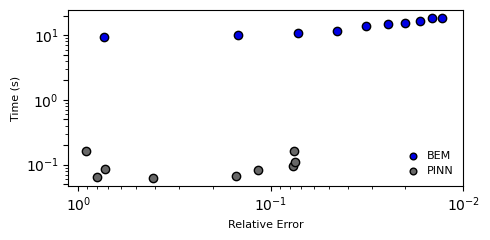

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# --- Load CSV data ---
bem_df = pd.read_csv("data/bem_accuracy_vs_n.csv")
pinn_df = pd.read_csv("data/pinn_accuracy_vs_architecture.csv")

# --- Extract values ---
bem_rel_error = bem_df["relative_error"]
bem_time = bem_df["time_sec"]

pinn_rel_error = pinn_df["relative_error"]
pinn_time = pinn_df["time_sec"]

# --- Plot ---
plt.figure(figsize=(5.0, 2.5))

# BEM curve
#plt.plot(bem_rel_error, bem_time, '-', color='#000071ff')
plt.scatter(bem_rel_error, bem_time, color='#0000e5ff', edgecolors='black', zorder=5, label='BEM')

# PINN curve
#plt.plot(pinn_rel_error, pinn_time, '-', color='#676767ff')
plt.scatter(pinn_rel_error, pinn_time, color='#676767ff', edgecolors='black', zorder=5, label='PINN')

# Axes labels
plt.xlabel('Relative Error', fontsize=8)
plt.ylabel('Time (s)', fontsize=8)

# Log-log scale
plt.xscale('log')
plt.yscale('log')

# Invert both axes
ax = plt.gca()
ax.invert_xaxis()
#ax.invert_yaxis()

# Add custom ticks for x-axis to ensure 1e-2 is visible and labeled
x_ticks = [1e+0, 1e-1, 1e-2]
ax.set_xticks(x_ticks)
ax.set_xticklabels([r'$10^{0}$', r'$10^{-1}$', r'$10^{-2}$'])

# Keep log ticks on y-axis
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, 2.0, 5.0), numticks=10))

# Legend
plt.legend(loc='lower right', fontsize=8, frameon=False, handletextpad=0.2, markerscale=0.8)

# Save and show
plt.tight_layout()
plt.savefig("figures/rel_error_time.svg", dpi=150, bbox_inches='tight')
plt.show()
